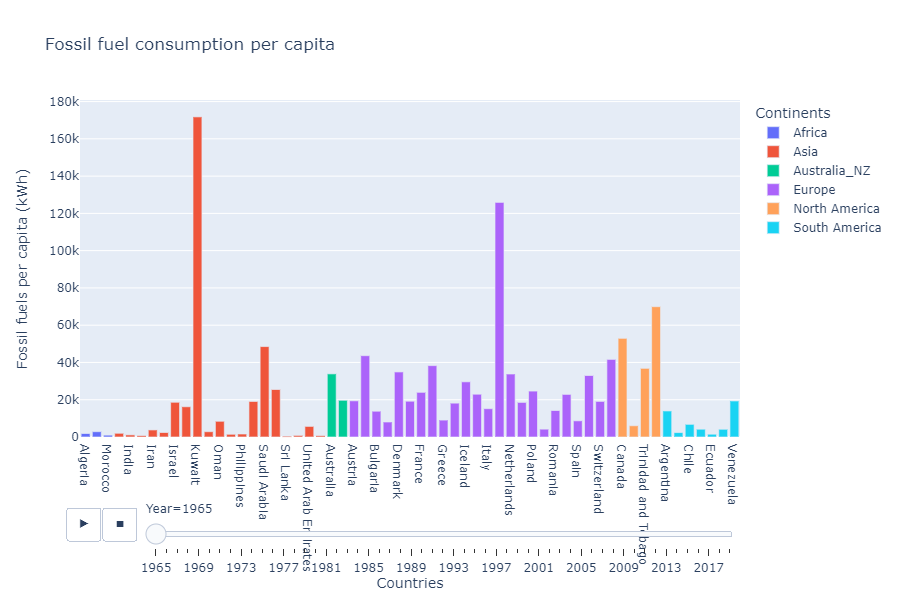

In [134]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

inicial = pd.read_csv("datasets/fossil-fuels-per-capita.csv")
ffpc = pd.DataFrame(inicial)
exclude=["OWID_WRL"]
ffpc=ffpc[~ffpc["Code"].isin(exclude)]
Africa = pd.read_csv("datasets/Countries-Africa.csv")
Asia = pd.read_csv("datasets/Countries-Asia.csv")
Australia_NZ = pd.read_csv("datasets/Countries-Australia-NZ.csv")
Europe = pd.read_csv("datasets/Countries-Europe.csv")
North_America = pd.read_csv("datasets/Countries-North-America.csv")
South_America = pd.read_csv("datasets/Countries-South-America.csv")
Africa_df = pd.DataFrame()
Asia_df = pd.DataFrame()
Australia_NZ_df = pd.DataFrame()
Europe_df = pd.DataFrame()
North_America_df = pd.DataFrame()
South_America_df = pd.DataFrame()
for nome in ffpc["Entity"].unique():
    ffpc_nome = pd.DataFrame(ffpc.loc[ffpc.loc[:, "Entity"] == f"{nome}"])

    if nome in list(Africa["name"]):
        Africa_df = Africa_df.append(ffpc_nome, ignore_index=True)
        Africa_df["Continent"] = "Africa"
    if nome in list(Asia["name"]):
        Asia_df = Asia_df.append(ffpc_nome, ignore_index=True)
        Asia_df["Continent"] = "Asia"
    if nome in list(Australia_NZ["name"]):
        Australia_NZ_df = Australia_NZ_df.append(ffpc_nome, ignore_index=True)
        Australia_NZ_df["Continent"] = "Australia_NZ"
    if nome in list(Europe["name"]):
        Europe_df = Europe_df.append(ffpc_nome, ignore_index=True)
        Europe_df["Continent"] = "Europe"
    if nome in list(North_America["name"]):
        North_America_df = North_America_df.append(ffpc_nome, ignore_index=True)
        North_America_df["Continent"] = "North America"
    if nome in list(South_America["name"]):
        South_America_df = South_America_df.append(ffpc_nome, ignore_index=True)
        South_America_df["Continent"] = "South America"


ffpc_2 = pd.concat([Africa_df, Asia_df, Australia_NZ_df, Europe_df, North_America_df, South_America_df],
                         axis=0, ignore_index=True)

fig=px.bar(x=ffpc_2["Entity"], 
           y=ffpc_2["Fossil fuels per capita (kWh)"], 
           color = ffpc_2["Continent"], 
           animation_frame=ffpc_2["Year"],
           title="Fossil fuel consumption per capita",
           labels={'y':'Fossil fuels per capita (kWh)',
                   'x':'Countries',
                   'color':'Continents',
                   'animation_frame':'Year'})
fig.update_layout(height=600, width=800)
fig.show()



Decidi fazer um gráfico com animação que, ao longo do tempo, mostrasse o consumo de combustível fóssil per capita de cada país. Como o dataset que peguei não havia informação dos continentes, reutilizei um método que combina outros datasets para trazer esses dados, com a diferença de combinar a variável respectiva ao nome do país ao invés de seu código. Inicialmente, a ideia disso era dividir o resultado final entre 6 gráficos, um para cada continente. Contudo, isso não se mostrou a melhor solução, uma vez que o gráfico em seu tamanho normal já é bastante concentrado, o que fazia com que os 6 gráficos menores ficassem uma bagunça. Decidi então aproveitar que já tinha os continentes para atribuir estes a cor de cada barra, que antes era específica para cada país, o que por sua vez também era um exagero. Assim, creio que esta foi a melhor decisão para a apresentação do gráfico. 

O que me chamou mais atenção foi que um país estava à frente dos demais, e não era por pouco. Imaginei primeiramente que seria um país como os Estados Unidos, bastante comentado quando o assunto é petróleo. Contudo, se tratava de Catar, um país asiático. Decidi pesquisar e fiquei impressionado: de acordo com o Wikipedia 'Foi um protetorado britânico até ganhar a independência em 1971. Desde então, tornou-se um dos estados mais ricos da região, devido às receitas oriundas do petróleo e do gás natural (possui a terceira maior reserva mundial de gás).  A riqueza e o padrão de vida do Catar se comparam com os dos Estados da Europa Ocidental, tendo o país o maior PIB per capita no mundo árabe de acordo com o Fundo Monetário Internacional (2006) e o maior PIB per capita (com base na paridade do poder de compra) no mundo segundo o CIA World Factbook.'